In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import scipy as sc
from matplotlib.colors import LogNorm



from simulation import *
from aesthetics import *
from plot import * 
prepare_plot()

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

# What happens if I increase flux at the same time as the catalytic rate?

In [2]:
catalytic_rates = np.linspace(1, 6, 100)
concentrations = np.linspace(1, 6, 100)
fluxes = np.zeros(( len(catalytic_rates), len(concentrations) ))

for i, catalytic_rate in enumerate(catalytic_rates):
    for j, concentration in enumerate(concentrations):
        this = Simulation(data_source = 'adk_md_data')
        this.name = 'chi2THR175'
        this.cSubstrate = 10**-concentration
        this.catalytic_rate = 10**catalytic_rate
        this.simulate()
        fluxes[i, j] = np.mean(this.flux_u + this.flux_b)
        del this

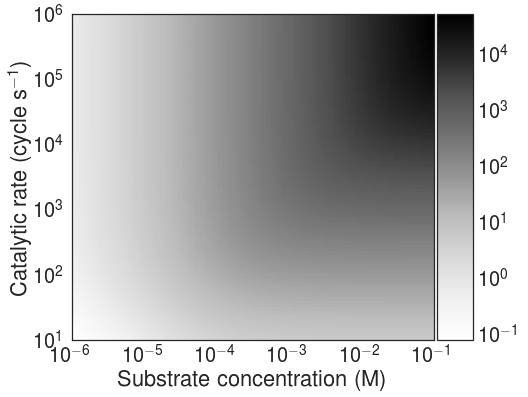

In [7]:
x = concentrations
y = catalytic_rates
z = fluxes

fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1)
ax1 = plt.subplot(grid[0, 0])    


# im = ax1.imshow(z, vmin=z.min(), vmax=z.max(), origin='lower',
#           extent=[x.min(), x.max(), y.min(), y.max()])

from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext
im = ax1.pcolormesh(10**-concentrations, 10**catalytic_rates, abs(fluxes), norm=LogNorm())


from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="10%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
ax1.set_xscale('log')
#ax1.set_xlim([10**-6, 10**0])
ax1.set_yscale('log')
#ax1.set_ylim([10**6, 10**0])

ax1.set_xlabel('Substrate concentration (M)')
ax1.set_ylabel('Catalytic rate (cycle s$^{-1}$)')

In [18]:
catalytic_rates = np.linspace(0, 2, 20)
concentrations = np.linspace(0, 2, 20)

df = pd.DataFrame()

for i, catalytic_rate in enumerate(catalytic_rates):
    for j, concentration in enumerate(concentrations):
        this = Simulation(data_source = 'adk_md_data')
        this.name = 'chi2THR175'
        this.cSubstrate = 10**-concentration
        this.catalytic_rate = 10**catalytic_rate
        this.simulate()
        
        df = df.append(pd.DataFrame({'Concentration': 10**-concentration,
                                     'Catalytic rate': 10**catalytic_rate,
                                     'Flux': np.mean(this.flux_u + this.flux_b)
                                    }, index=[0]), ignore_index=True)
        del this

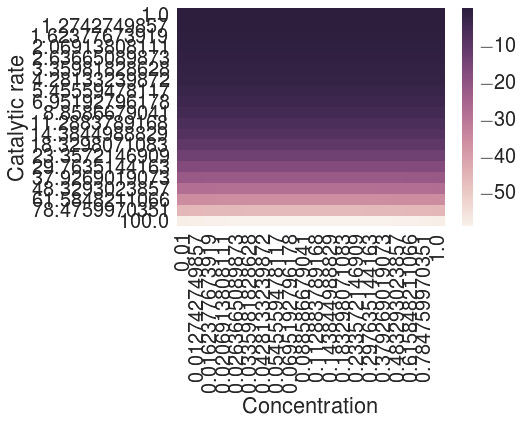

In [19]:
df = df.pivot('Catalytic rate', "Concentration", "Flux")
sns.heatmap(df)

In [9]:
catalytic_rates = np.arange(0, 6, 0.2)
concentrations = np.arange(0, 6, 0.2)

df = pd.DataFrame()

for i, catalytic_rate in enumerate(catalytic_rates):
    for j, concentration in enumerate(concentrations):
        this = Simulation(data_source = 'adk_md_data')
        this.name = 'chi2THR175'
        this.cSubstrate = 10**-concentration
        this.catalytic_rate = 10**catalytic_rate
        this.simulate()
        
        df = df.append(pd.DataFrame({'Concentration': 10**-concentration,
                                     'Catalytic rate': 10**catalytic_rate,
                                     'Flux': abs(np.mean(this.flux_u + this.flux_b))
                                    }, index=[0]), ignore_index=True)
        del this


In [10]:
df.head()

,Catalytic rate,Concentration,Flux
0,1.0,1.000000,0.590940
1,1.0,0.630957,0.591857
2,1.0,0.398107,0.595210
3,1.0,0.251189,0.597022
4,1.0,0.158489,0.597990


In [11]:
df.tail()

,Catalytic rate,Concentration,Flux
895,630957.34448,0.000010,5.933124
896,630957.34448,0.000006,3.743871
897,630957.34448,0.000004,2.362229
898,630957.34448,0.000003,1.490153
899,630957.34448,0.000002,0.940336


In [12]:
df = df.pivot('Catalytic rate', "Concentration", "Flux")    

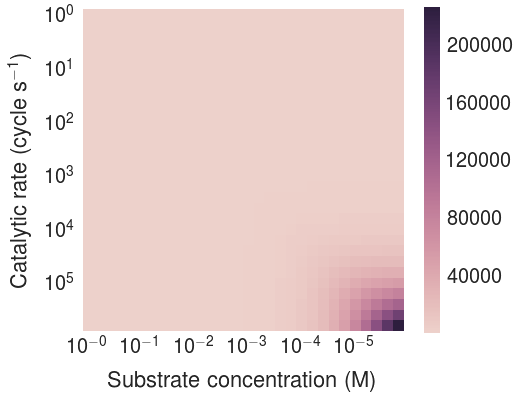

In [13]:
fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1)
ax1 = plt.subplot(grid[0, 0])    

cmap = sns.cubehelix_palette(as_cmap=True)

xticks = ['' for i in concentrations]
yticks = ['' for i in catalytic_rates]

xticks[::5] = ['10$^{{ -{0:1.0f} }}$'.format(i) for i in concentrations[::5]]
yticks[::5] = ['10$^{{  {0:1.0f} }}$'.format(i) for i in catalytic_rates[::5]]

sns.heatmap(df, linewidth=0, 
                 xticklabels=xticks, 
                 yticklabels=yticks, 
                 square=True, cmap=cmap,
#                 norm=LogNorm(vmin=df.min(), vmax=df.max())
           )
ticker = mpl.ticker.LogLocator(numticks=8)
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax1.set_ylabel('Catalytic rate (cycle s$^{{-1}}$)')
ax1.set_xlabel('Substrate concentration (M)')

ax1.xaxis.labelpad = 15
ax1.yaxis.labelpad = 15

# I think the above plot has reversed the axis labels for concentration. Check.